## Regression exercise
#### ## Welcome in the part 1!!

We are going to work with randomly generalize data and trying to fit different polynomial regressions to it and explore how our loss function behaves. We will use the formulas we introduced in theoretical sections and we will create linear regression model from scratch.

#### Task 1

Write a function psi(x,m) defined as $\psi(x)=[1, x, x ^2, ..., x^m]$

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
def psi(x,m):
    ps=[]
    for i in range(m+1):
        ps.append(x**i)
    return ps

In [3]:
psi(5,10)

[1, 5, 25, 125, 625, 3125, 15625, 78125, 390625, 1953125, 9765625]

#### Task 2

Write a function $h(x,\alpha)$ defined as $h(x,\alpha)=\alpha^T\psi(x)$

In [34]:
def h(x,a):
    a = np.array(a)
    return a.T.dot(x)

#### Task 3
Create a random 3rd order polynomial (we call it p3)

In [5]:
#p3 = np.random.rand(1,1)*(x**3) 

In [6]:
def p3(x):
    return x**3

#### Task 4
Choose an interval [a,b], on which the polynomial is S-shaped.

In [7]:
a = -10
b = 10

#### Task 5
Sample 30 random values in [a,b] and stored them in `xs`.

In [8]:
xs = np.random.randint(a, b+1, size = 30)

In [9]:
xs

array([-5, -2,  1, -4,  1, -4, -1,  5,  6, -9, -4, -9, -9, -8,  8,  0,  2,
       -9, -9,  3,  0,  4,  2, 10,  5,  3,  2,  4,  0, -2])

#### Task 6
For each x in xs, compute p3(x) and store them as `ys`.

In [10]:
ys = []
for i in xs:
    ys.append(p3(i))

In [11]:
ys

[-125,
 -8,
 1,
 -64,
 1,
 -64,
 -1,
 125,
 216,
 -729,
 -64,
 -729,
 -729,
 -512,
 512,
 0,
 8,
 -729,
 -729,
 27,
 0,
 64,
 8,
 1000,
 125,
 27,
 8,
 64,
 0,
 -8]

In [12]:
ysa = p3(xs)

In [13]:
ysa.shape

(30,)

#### Task 7:
Plot `ys` against `xs` on [a,b]. Does it look like a third order polynomial?

In [14]:
import seaborn as sns

<AxesSubplot:>

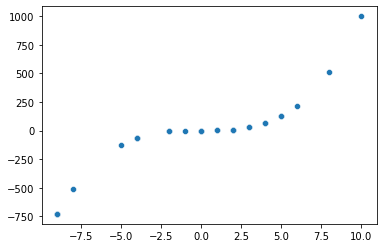

In [15]:
sns.scatterplot(y = ys, x=xs)

In [16]:
x = np.linspace(-10,10,100)

## Fitting the data

We will try to fit the data by a polynomial of order m=2. 

#### Task 8:

Using xs and psi, create the matrix X defined as 

<img src="matrixX.png">

In [17]:
p = psi(xs,2)
p

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1], dtype=int32),
 array([-5, -2,  1, -4,  1, -4, -1,  5,  6, -9, -4, -9, -9, -8,  8,  0,  2,
        -9, -9,  3,  0,  4,  2, 10,  5,  3,  2,  4,  0, -2], dtype=int32),
 array([ 25,   4,   1,  16,   1,  16,   1,  25,  36,  81,  16,  81,  81,
         64,  64,   0,   4,  81,  81,   9,   0,  16,   4, 100,  25,   9,
          4,  16,   0,   4], dtype=int32)]

In [18]:
xmatrix = np.column_stack(p)
xmatrix

array([[  1,  -5,  25],
       [  1,  -2,   4],
       [  1,   1,   1],
       [  1,  -4,  16],
       [  1,   1,   1],
       [  1,  -4,  16],
       [  1,  -1,   1],
       [  1,   5,  25],
       [  1,   6,  36],
       [  1,  -9,  81],
       [  1,  -4,  16],
       [  1,  -9,  81],
       [  1,  -9,  81],
       [  1,  -8,  64],
       [  1,   8,  64],
       [  1,   0,   0],
       [  1,   2,   4],
       [  1,  -9,  81],
       [  1,  -9,  81],
       [  1,   3,   9],
       [  1,   0,   0],
       [  1,   4,  16],
       [  1,   2,   4],
       [  1,  10, 100],
       [  1,   5,  25],
       [  1,   3,   9],
       [  1,   2,   4],
       [  1,   4,  16],
       [  1,   0,   0],
       [  1,  -2,   4]], dtype=int32)

In [19]:
xmatrix.shape

(30, 3)

In [20]:
xpinv = np.linalg.pinv(xmatrix)

In [21]:
p=psi(xs,2)

In [22]:
row1 = pd.Series(p[0])
row2 = pd.Series(p[1])
row3 = pd.Series(p[2])

In [23]:
pmat = pd.concat([row1,row2,row3],axis=1).T
pmat

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,-5,-2,1,-4,1,-4,-1,5,6,-9,...,0,4,2,10,5,3,2,4,0,-2
2,25,4,1,16,1,16,1,25,36,81,...,0,16,4,100,25,9,4,16,0,4


#### Task 9
Compute the optimal $\alpha$ using the expression $\alpha = (XX^T)^+Xy$ where $(XX^T)^+$ is the pseudoinverse matrix. y is our `ys` from the Task 6.

In [24]:
a = np.linalg.pinv(pmat).dot(ys)

In [25]:
a

array([-29.80317749,  63.07581236,  -0.2456234 ])

In [26]:
a.shape

(3,)

#### Task 10
Plot the data and the computed polynomial. Does it fit?

In [27]:
import matplotlib.pyplot as plt

In [28]:
def p2(x):
    return (-23.13658892 + 61.8556731*x + 0.89094954*x**2)

670304.2183229073


ValueError: shapes (3,) and (100,) not aligned: 3 (dim 0) != 100 (dim 0)

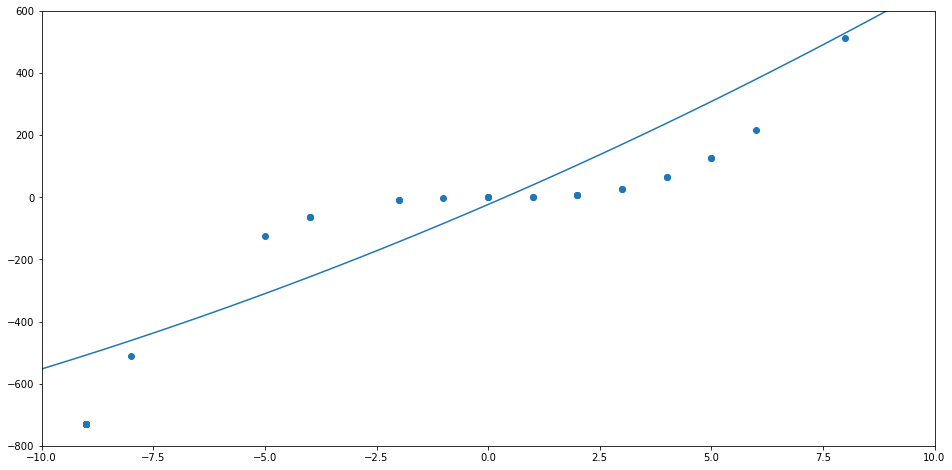

In [36]:
print(sum((a.T.dot(pmat)-ys)**2))
fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim((-10, 10))
ax.set_ylim((-800, 600))
ax.scatter(xs,ys)
ax.plot(x,p2(x))
ax.plot(h(x,a),p2(x))

#### Task 11
Repeat the process for m=3,…,10. What do you observe?

In [56]:
def p(x,a):
    return (a[0] + a[1]*x + a[2]*x**2 + a[3]*x**3)

In [57]:
X_arrays = psi(xs,3)
row1 = pd.Series(X_arrays[0])
row2 = pd.Series(X_arrays[1])
row3 = pd.Series(X_arrays[2])
row4 = pd.Series(X_arrays[3])

In [58]:
X_mat = pd.concat([row1, row2, row3, row4], axis = 1).T
X_mat

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,9,-8,7,3,2,7,-2,-1,-3,-4,...,-9,3,5,8,-3,8,-6,9,-3,8
2,81,64,49,9,4,49,4,1,9,16,...,81,9,25,64,9,64,36,81,9,64
3,729,-512,343,27,8,343,-8,-1,-27,-64,...,-729,27,125,512,-27,512,-216,729,-27,512


In [59]:
a = np.linalg.pinv(X_mat.dot(X_mat.T)).dot(X_mat.dot(ys))
a

array([-3.76871867e-11, -1.81898940e-12,  6.15063556e-13,  1.00000000e+00])

1.6759570049250932e-20


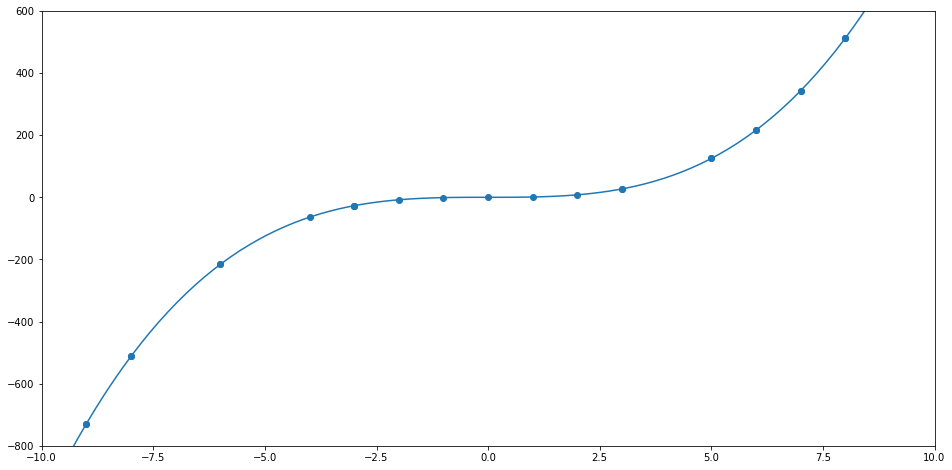

In [60]:
print(sum((a.T.dot(X_mat)-ys)**2))
fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim((-10, 10))
ax.set_ylim((-800, 600))
ax.scatter(xs,ys)
ax.plot(x,p(x,a))

In [72]:
xs.shape

(30,)

In [68]:
a.T.shape

(4,)

In [73]:
a.shape

(4,)

#### Task 12
Plot the value of the loss (defined as $ l(\alpha^Tx, y) = \sum(\alpha^Tx - y)^2 $  ) for m=2,…,10. y is our `ys` from the Task 6. What do you observe? Could you tell the optimal m from the plot?

In [70]:
def loss(a,x):
    for i in range(2,10):
        l = sum((a.T.dot(xs)-ys)^i)

ValueError: shapes (4,) and (30,) not aligned: 4 (dim 0) != 30 (dim 0)

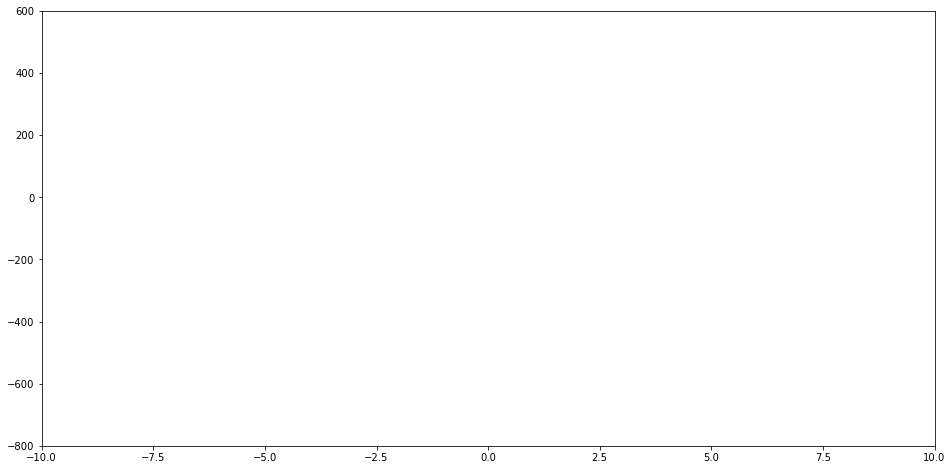

In [71]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim((-10, 10))
ax.set_ylim((-800, 600))
ax.plot(x,loss(a,x))